In [2]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import ydata_profiling as ydp
import arabic_reshaper
from bidi.algorithm import get_display

 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [3]:
#Read in the csv file and convert to a Pandas dataframe
df = pd.read_csv('Jadarat_data.csv')

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

Yes it is, the data has a license

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

No it is not up to date

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


Yes, since there is only one data file

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


- Regarding the sample, I would say it is relevance, but there is some of columns which are not relevance to our interest.

In [4]:
# Keep relevant columns
df = df[['job_title', 'job_desc', 'job_tasks', 'comp_name', 'comp_type', 'comp_size', 'eco_activity', 'qualif', 'region', 'city', 'benefits', 'contract', 'positions', 'exper', 'gender'  ]]

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [5]:
ydp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Dataframe problems
Dataset has 54 (3.7%) duplicate rows.  
- **Duplicates**

comp_type is highly imbalanced (96.7%).  
- **Imbalance**

contract is highly imbalanced (88.8%).  
- **Imbalance**

positions is highly imbalanced (53.1%).  
- **Imbalance**

eco_activity has 90 (6.1%) missing values.  
- **Missing**

qualif has 690 (46.9%) missing values.  
- **Missing**


In [5]:
# remove duplicates
df = df.drop_duplicates()

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [1]:
# Already done in the previous step
# Columns have a missing values are: qualif, comp_size and eco_activity

In [18]:
print(f'The number of missing values in the qualif column is: {df.qualif.isnull().sum()}')
print(f'The number of missing values in the comp_size column is: {df.comp_size.isnull().sum()}')
print(f'The number of missing values in the eco_activity column is: {df.eco_activity.isnull().sum()}')


The number of missing values in the qualif column is: 0
The number of missing values in the comp_size column is: 14
The number of missing values in the eco_activity column is: 83


In [23]:
df['qualif'].unique()

array(["['Language data', 'اللغة الانجليزية', 'محترف']", nan,
       "['Language data', 'الانجليزيه', 'محترف']",
       "['Skill data', 'صيانة السيارات وتقييم الاعطال', 'محترف']",
       "['Skill data', 'تحمل ضغط العمل', 'محترف', 'Language data', 'الانجليزية', 'متوسط', 'Professional certificate \\\\ License data', 'التسجيل في هيئة المحاسبين السعوديين', 'مفيد']",
       "['Skill data', 'اجادة الحاسب والتقنية ', 'متوسط', 'Language data', 'اللغة الانجليزية ', 'مبتدئ']",
       "['Language data', 'لغة انجليزية', 'محترف']",
       "['Language data', 'لغة انجليزية', 'محترف', 'Professional certificate \\\\ License data', 'PMP', 'ضروري']",
       "['Language data', 'لغة انجليزية', 'متوسط']",
       "['Skill data', 'تسويق', 'مبتدئ']",
       "['Language data', 'انجليزية', 'متوسط']",
       "['Skill data', 'التسويق', 'مبتدئ', 'كتابة المحتوى', 'مبتدئ', 'مهارات التفاوض', 'مبتدئ', 'Language data', 'العربية', 'محترف', 'الانجليزية', 'متوسط']",
       "['Language data', 'الانجليزي ', 'متوسط', 'Profess

In [6]:
# Check if there is a same job title with a different qualification, if so, we will replace the missing values with the most common qualification for that job title
missing_before = df['qualif'].isnull().sum()
df['qualif'] = df.groupby('job_title')['qualif'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan))
missing_after = df['qualif'].isnull().sum()
# Not Worked :)

# Replace the missing values with 'Unknown'
df['qualif'] = df['qualif'].fillna('Unknown')

In [7]:
# Replace the missing values with 'غير محدد'
df['comp_size'] = df['comp_size'].fillna('غير محدد')

In [8]:
# Replace the missing values with 'غير محدد'
df['eco_activity'] = df['eco_activity'].fillna('غير محدد')

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [9]:
# Already done in the previous step

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1415 entries, 0 to 1468
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   job_title     1415 non-null   object
 1   job_desc      1415 non-null   object
 2   job_tasks     1415 non-null   object
 3   comp_name     1415 non-null   object
 4   comp_type     1415 non-null   object
 5   comp_size     1415 non-null   object
 6   eco_activity  1415 non-null   object
 7   qualif        1415 non-null   object
 8   region        1415 non-null   object
 9   city          1415 non-null   object
 10  benefits      1415 non-null   object
 11  contract      1415 non-null   object
 12  positions     1415 non-null   object
 13  exper         1415 non-null   object
 14  gender        1415 non-null   object
dtypes: object(15)
memory usage: 176.9+ KB


In [11]:
# add a salary column, format in benefits column is: ['Salary', '10000.0', 'Benefits', 'بدل مواصلات']
df['salary'] = (df['benefits'].apply(lambda x: x.split("'")[3])).astype(float)

# drop the benefits column
df = df.drop(columns=['benefits'])

In [12]:
# change the data type of the 'exper' column to int
df['exper'] = (df['exper'].apply(lambda x: x.split()[0])).astype(int)
df['exper']

0       0
1       0
2       2
3       0
4       0
       ..
1464    2
1465    0
1466    2
1467    0
1468    0
Name: exper, Length: 1415, dtype: int32

In [13]:
# Calculate the number of positions available by subtracting the starting position from the ending position
df['positions'] = df['positions'].apply(lambda x: int(x.split('/')[1]) - int(x.split('/')[0]))

# Display the updated 'positions' column
df['positions']

0        1
1        3
2        2
3       10
4        1
        ..
1464     1
1465     1
1466     1
1467     1
1468     3
Name: positions, Length: 1415, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1415 entries, 0 to 1468
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   job_title     1415 non-null   object 
 1   job_desc      1415 non-null   object 
 2   job_tasks     1415 non-null   object 
 3   comp_name     1415 non-null   object 
 4   comp_type     1415 non-null   object 
 5   comp_size     1415 non-null   object 
 6   eco_activity  1415 non-null   object 
 7   qualif        1415 non-null   object 
 8   region        1415 non-null   object 
 9   city          1415 non-null   object 
 10  contract      1415 non-null   object 
 11  positions     1415 non-null   int64  
 12  exper         1415 non-null   int32  
 13  gender        1415 non-null   object 
 14  salary        1415 non-null   float64
dtypes: float64(1), int32(1), int64(1), object(12)
memory usage: 171.3+ KB


In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df

,job_title,job_desc,job_tasks,comp_name,comp_type,comp_size,eco_activity,qualif,region,city,contract,positions,exper,gender,salary
0,محاسب,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,شركة مقر العالم للسفريات,خاص,متوسطة فئة أ,أنشطة وكالات السياحة والسفر,"['Language data', 'اللغة الانجليزية', 'محترف']",الرياض,AR RIYADH...,دوام كامل,1,0,both,5000.0
1,بائع,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة عالم الكهرباء للمقاولات,خاص,متوسطة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,"['Language data', 'الانجليزية', 'متوسط']",المنطقة الشرقية,AD DAMMAM...,دوام كامل,3,0,both,5000.0
2,أخصائي عمليات موارد بشرية,['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...,[' تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...,شركه دار السلام,خاص,متوسطة فئة أ,ترميمات المباني السكنية والغير سكنية,"['Language data', 'الانجليزيه', 'محترف']",الرياض,ATH THUMA...,دوام كامل,2,2,both,4000.0
3,ميكانيكي سيارات,['تشخيص أعطال السيارات وإصلاحها وتنفيذ برامج ا...,[' فحص أداء المعدّات الكهربائية والميكانيكية...,مؤسسة لمكو لغيار الزيوت,خاص,صغيرة فئة ب,غير محدد,"['Skill data', 'صيانة السيارات وتقييم الاعطال'...",المنطقة الشرقية,AL HUFUF...,دوام كامل,10,0,M,5000.0
4,محاسب,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,مؤسسة فكرة اليمامة للمقاولات,خاص,كبيرة,الإنشاءات العامة للمباني السكنية,"['Skill data', 'تحمل ضغط العمل', 'محترف', 'Lan...",الرياض,AR RIYADH...,دوام كامل,1,0,both,5000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,بائع,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة النجمة الذهبية للتبريد والتكييف شركة شخص ...,خاص,صغيرة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,"['Language data', 'الانجليزية', 'متوسط']",المنطقة الشرقية,AL HUFUF...,دوام كامل,1,2,F,4000.0
1465,مهندس تقنية معلومات,['دراسة احتياجات العميل من الأجهزة الحاسوبية و...,[' متابعة وتقييم عملية جمع وتحليل المعطيات و...,مطعم الاوراق الخضر لتقديم الوجبات,خاص,صغيرة فئة ب,المطاعم مع الخدمة,"['Language data', 'انجليزي', 'محترف']",الرياض,AR RIYADH...,دوام كامل,1,0,both,5500.0
1466,سكرتير,['دعم المدير أو الإدارة من خلال كتابة الوثائق ...,[' تدوين الملاحظات، التي يتم إملاؤها، بطريقة...,شركة ملتقى التجار لحاضنات و مسرعات الأعمال,خاص,صغيرة فئة ب,أنشطة حاضنات ومسرعات الأعمال,"['Skill data', 'فن التواصل', 'محترف', 'Languag...",مكة المكرمة,JEDDAH...,دوام كامل,1,2,both,4000.0
1467,صيدلي,['دراسة التركيبات الدوائية للعقاقير والعلاجات ...,[' دراسة مواصفات وتركيبات الادوية والعقاقير ...,شركة تقنية الدواجن والألبان للتجارة,خاص,صغيرة فئة ب,غير محدد,"['Professional certificate \\ License data', '...",الرياض,AR RIYADH...,دوام كامل,1,0,both,7000.0


**What is an Outlier?** 
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
 
![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

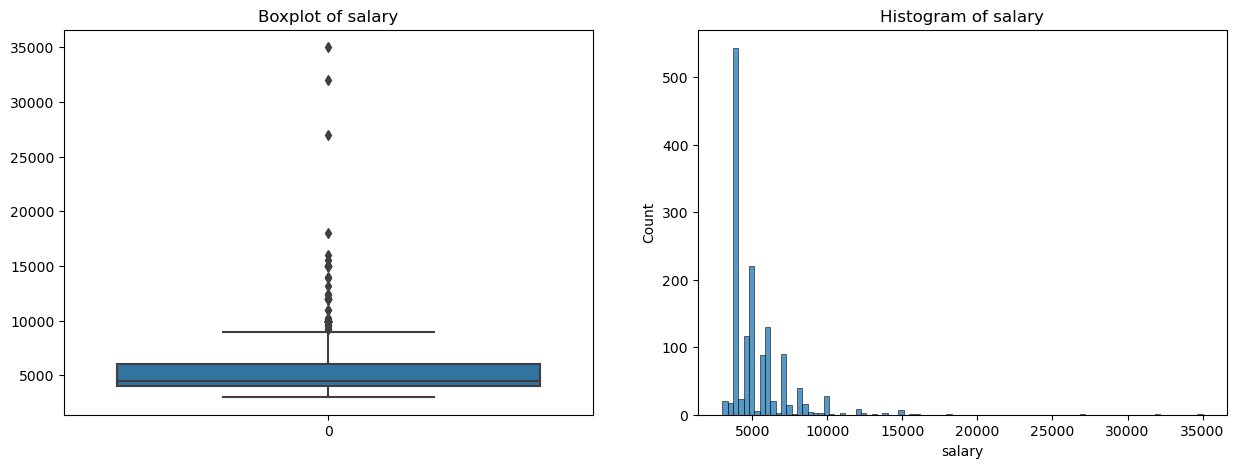

count     1413.000000
mean      5277.391366
std       2169.215658
min       3000.000000
25%       4000.000000
50%       4500.000000
75%       6000.000000
max      35000.000000
Name: salary, dtype: float64


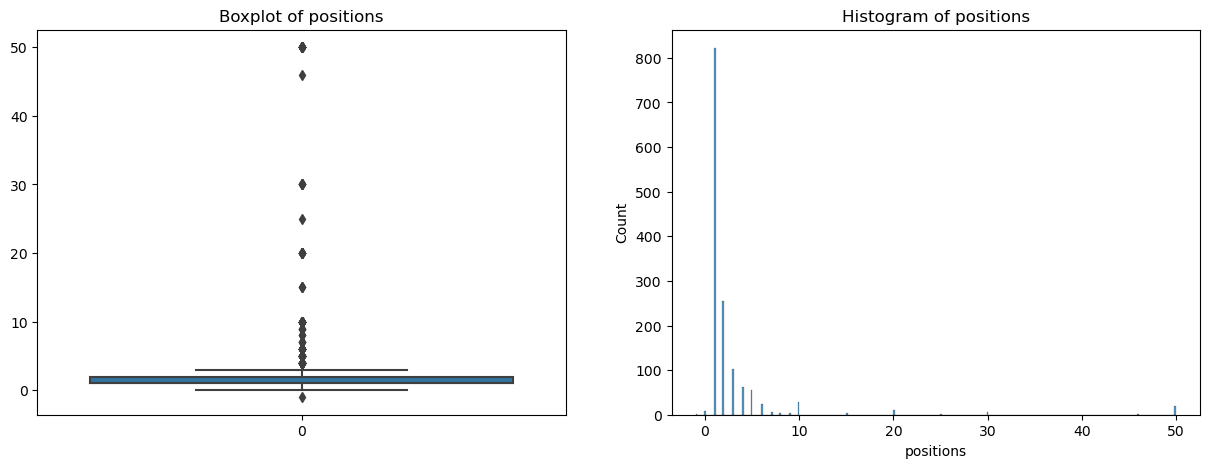

count    1413.000000
mean        2.934183
std         6.400960
min        -1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        50.000000
Name: positions, dtype: float64


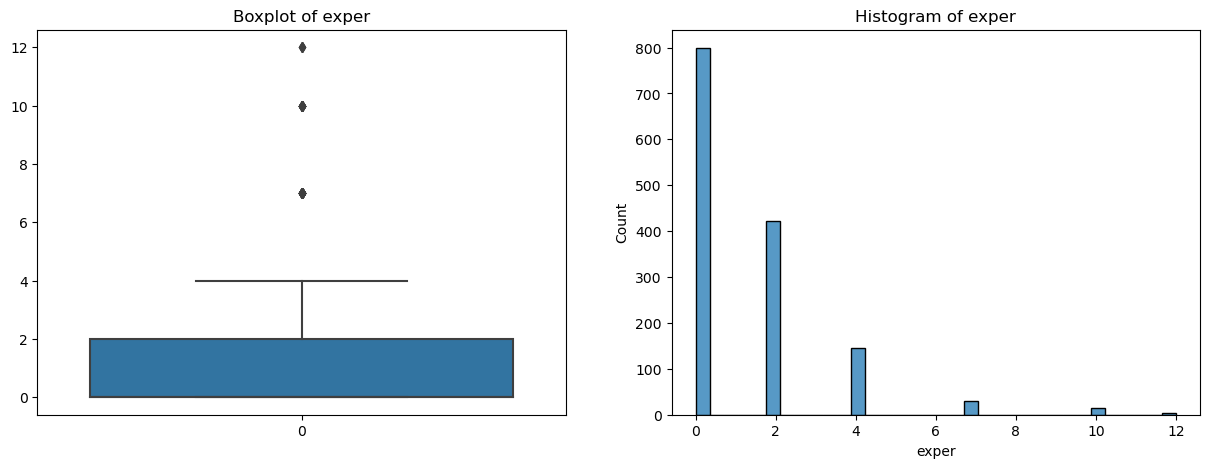

count    1413.000000
mean        1.277424
std         1.874091
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max        12.000000
Name: exper, dtype: float64


In [23]:
# Check for outliers for numerical columns

# List of numerical columns to check for outliers
col = ['salary', 'positions', 'exper']

# Loop through each numerical column
for i in col:
    # Create a boxplot and histogram for the column
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    sns.boxplot(df[i], ax=axes[0])
    axes[0].set_title(f'Boxplot of {i}')
    
    sns.histplot(df[i], ax=axes[1])
    axes[1].set_title(f'Histogram of {i}')
    
    plt.show()
    
    # Print the descriptive statistics for the column
    print(df[i].describe())

In [27]:
# Keep only the rows where the salary is less than or equal to 15000
df = df[df['salary'] <= 15000]

# Keep only the rows where the positions are less than or equal to 10
df = df[df['positions'] <= 10]

# Keep only the rows where the exper is less than or equal to 7
df = df[df['exper'] <= 7]

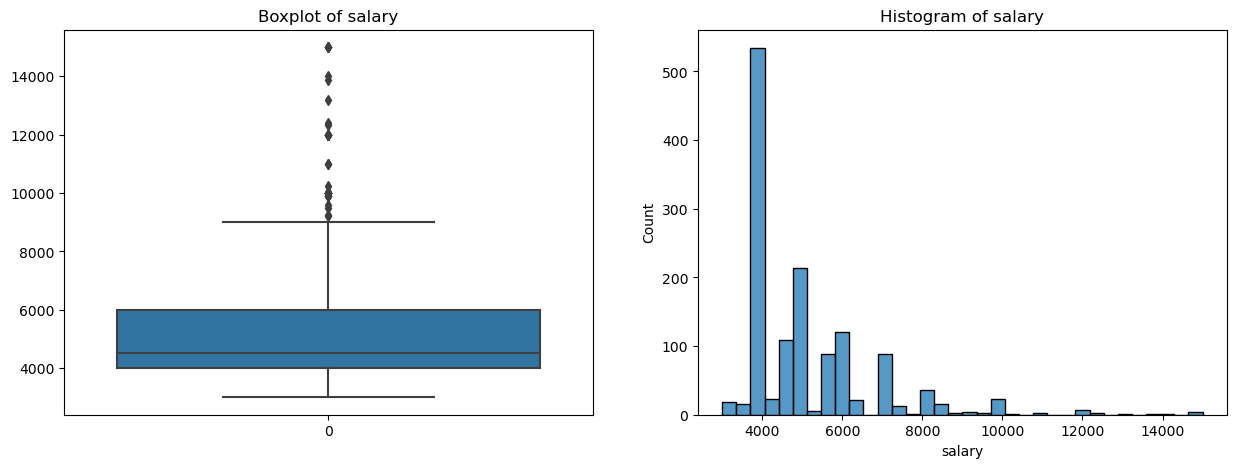

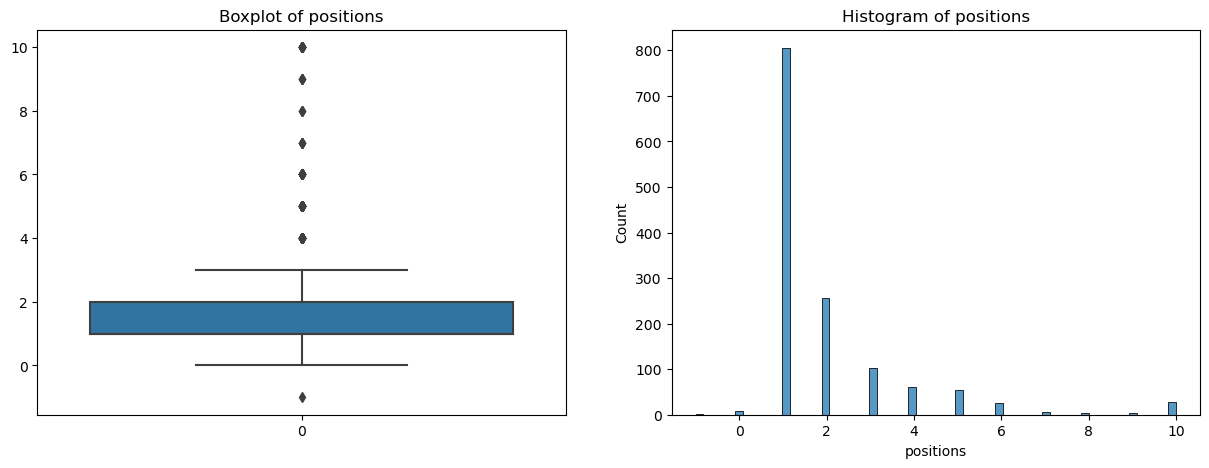

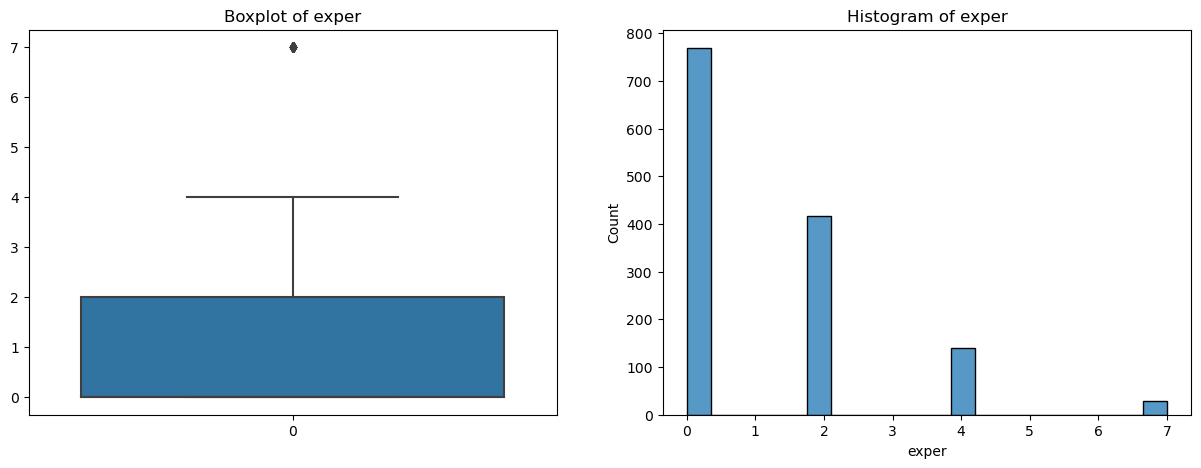

In [28]:
# List of numerical columns to check for outliers
col = ['salary', 'positions', 'exper']

# Loop through each numerical column
for i in col:
    # Create a boxplot and histogram for the column
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    sns.boxplot(df[i], ax=axes[0])
    axes[0].set_title(f'Boxplot of {i}')
    
    sns.histplot(df[i], ax=axes[1])
    axes[1].set_title(f'Histogram of {i}')
    
    plt.show()
    
    # Print the descriptive statistics for the column
    #print(df[i].describe())

## Questions
-    What proportion of job postings is attributed to each region within the kingdom?
-    Is there a gender preference indicated in the job postings?
-    What is the expected salary range for fresh graduates?
-    Are job opportunities predominantly targeted at individuals with experience, or is there room for fresh graduates as well?
-    What are the most common job titles in the dataset? (B)


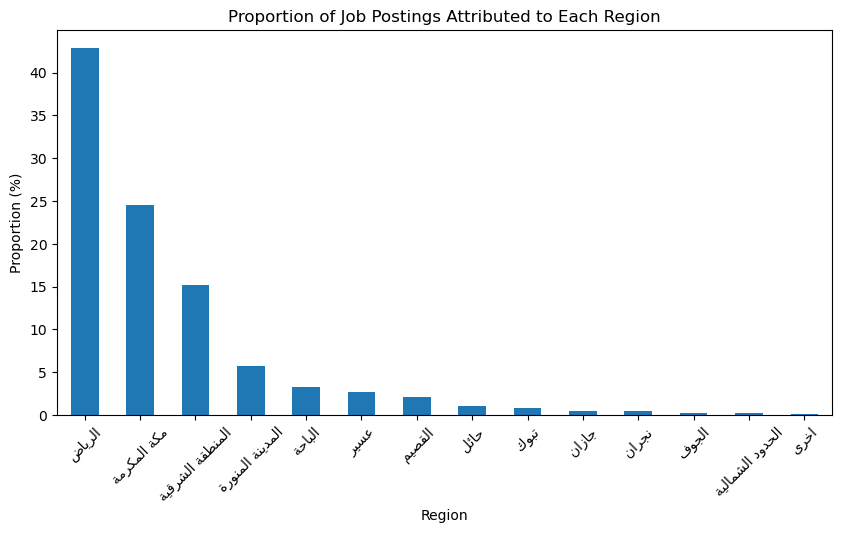

In [31]:
#Q1:  What proportion of job postings is attributed to each region within the kingdom?

# Calculate the proportion of job postings attributed to each region
region_proportion = df['region'].value_counts(normalize=True) * 100

# Reshape Arabic text for proper display
region_proportion.index = [get_display(arabic_reshaper.reshape(region)) for region in region_proportion.index]

# plot the proportion of job postings attributed to each region
plt.figure(figsize=(10, 5))
region_proportion.plot(kind='bar')
plt.title('Proportion of Job Postings Attributed to Each Region')
plt.xlabel('Region')
plt.ylabel('Proportion (%)')
plt.xticks(rotation=45)
plt.show()

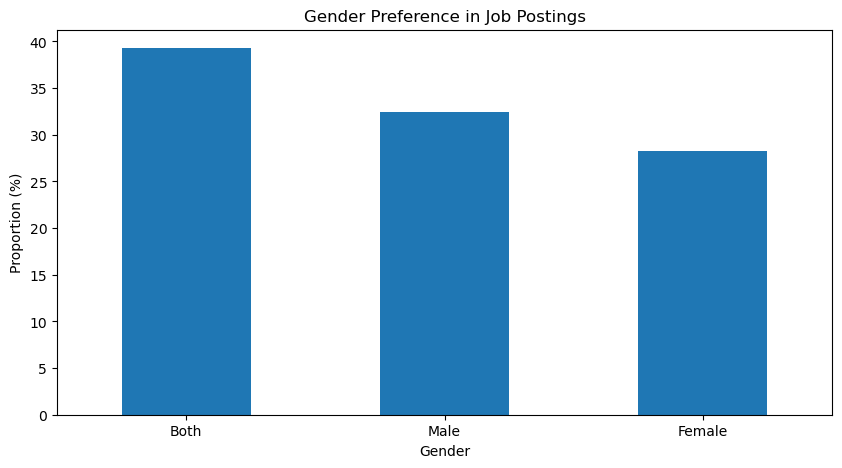

In [32]:
#Q2: Is there a gender preference indicated in the job postings?

# Create a mapping dictionary
gender_mapping = {'F': 'Female', 'M': 'Male', 'both': 'Both'}

# Apply the mapping to the 'gender' column
df['gender'] = df['gender'].map(gender_mapping)

# Calculate the proportion of each gender in the job postings
df_gender = df['gender'].value_counts(normalize=True) * 100

# Plot the gender preference
plt.figure(figsize=(10, 5))
df_gender.plot(kind='bar')
plt.title('Gender Preference in Job Postings')
plt.xlabel('Gender')
plt.ylabel('Proportion (%)')
plt.xticks(rotation=0)
plt.show()


In [35]:
# Q3: What is the expected salary range for fresh graduates?

# Filter the data for fresh graduates
fresh_grads = df[df['exper'] == 0]

# Calculate the mean and median salary for fresh graduates
mean_salary = fresh_grads['salary'].mean()
median_salary = fresh_grads['salary'].median()

# Display the mean and median salary for fresh graduates
print(f'The salary range for fresh graduates is: {fresh_grads["salary"].min()} - {fresh_grads["salary"].max()}')
print(f'The mean salary for fresh graduates is: {mean_salary}')
print(f'The median salary for fresh graduates is: {median_salary}')
print(f'The mode salary for fresh graduates is: {fresh_grads["salary"].mode()[0]}')


The salary range for fresh graduates is: 3000.0 - 12325.0
The mean salary for fresh graduates is: 4715.200260078023
The median salary for fresh graduates is: 4000.0
The mode salary for fresh graduates is: 4000.0


Proportion of job postings for fresh graduates: 56.79%
Proportion of job postings for experienced individuals: 43.21%


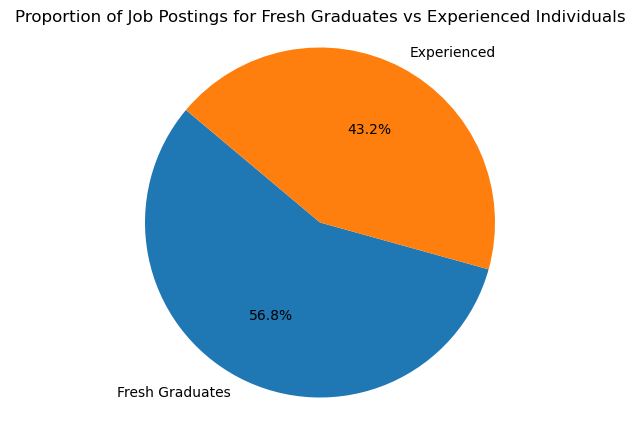

In [36]:
# Q4: Are job opportunities predominantly targeted at individuals with experience, or is there room for fresh graduates as well?

# Calculate the proportion of job postings for fresh graduates and experienced individuals
fresh_grads_proportion = fresh_grads.shape[0] / df.shape[0] * 100
experienced_proportion = df[df['exper'] > 0].shape[0] / df.shape[0] * 100

# Display the proportions
print(f'Proportion of job postings for fresh graduates: {fresh_grads_proportion:.2f}%')
print(f'Proportion of job postings for experienced individuals: {experienced_proportion:.2f}%')

# Plot the proportions
labels = ['Fresh Graduates', 'Experienced']
sizes = [fresh_grads_proportion, experienced_proportion]

plt.figure(figsize=(8, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Job Postings for Fresh Graduates vs Experienced Individuals')
plt.axis('equal')
plt.show()

In [37]:
# Save the cleaned dataset to a new CSV file
df.to_csv('cleaned_data.csv', index=False)

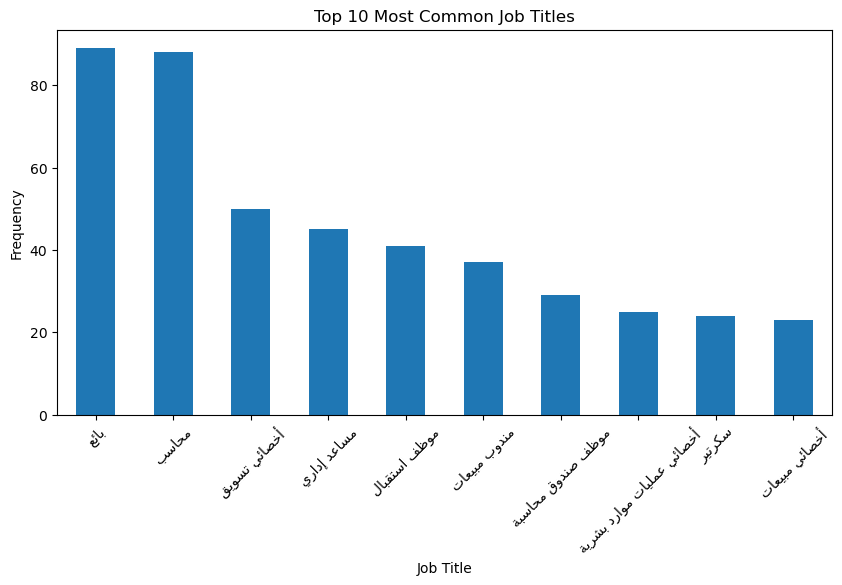

In [38]:
# Q5: What are the most common job titles in the dataset? (B)

# Calculate the most common job titles
job_titles = df['job_title'].value_counts().head(10)

# Reshape Arabic text for proper display
job_titles.index = [get_display(arabic_reshaper.reshape(title)) for title in job_titles.index]

# Plot the most common job titles
plt.figure(figsize=(10, 5))
job_titles.plot(kind='bar')
plt.title('Top 10 Most Common Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()